# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
pd.options.mode.chained_assignment = None 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

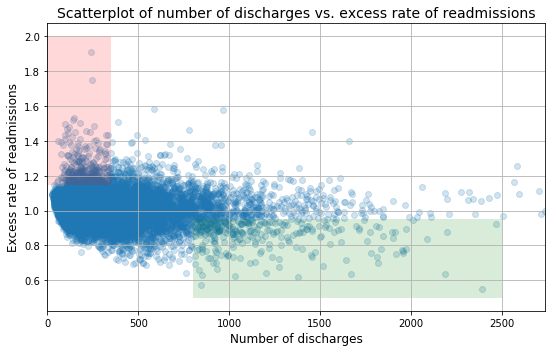

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Further Analysis and Recommendation - Andrew Siu

Hospital readmissions have been used as indciators of poor quality of care, such as inadequate discharge planning and care coordination. The goal of the Hospital Readmissions Reduction Program is to reduce such unnecessary and avoidable readmissions.

The initial report suggests taht hospitals with smaller number of discharges tend to have a higher excess readmission ratio. But it does not report the correlation coefficient or test whether the correlation is statistically significant. To improve the analysis, I will compute the Pearson correlation coefficient and conduct a hypothesis testing at 1% significance level, with the null hypothesis being zero correlation between the number of discharges and excess readmission ratio. 


In [5]:
import scipy.stats as stats
corr = stats.pearsonr(x,y)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))

The Pearson correlation coefficient: -0.09309554287590441
The p-value of a two-tailed test: 1.5022756426464526e-23


### Low Negative Correlation
The Pearson correlation coefficient is -0.09, suggesting a negative but small correlation between the number of discharges and excess readmission ratio. The p-value of the correlation test is less than 1%, so this negative relationship is indeed statistically significant. However, since the correlation is so small, it is not practical to assume that hospitals with smaller number of dischrages will always have a higher excess readmission ratio. As a result, I will not recommend that hospitals with smaller capacity be required to upgrade their resources or facilities. 


### Density Plot Revealing More Information
A scatter plot is useful in showing the relationship between two continuous variables. Although the scatter plot above uses translucency to lessen the problem of overplotting, there is still a large number of hospitals that have fewer than 1000 dischrages and overlap completely. At the same time, a few outlier hospitals have more than 3500 discharges. 

To have a better view of the data and to draw the outliers closer to the median, we can use the logarithm of the number of discharges instead. We will also use a density plot to reveal more information about the distribution of hospitals in terms of the number of discharges and excess readmission ratio. 

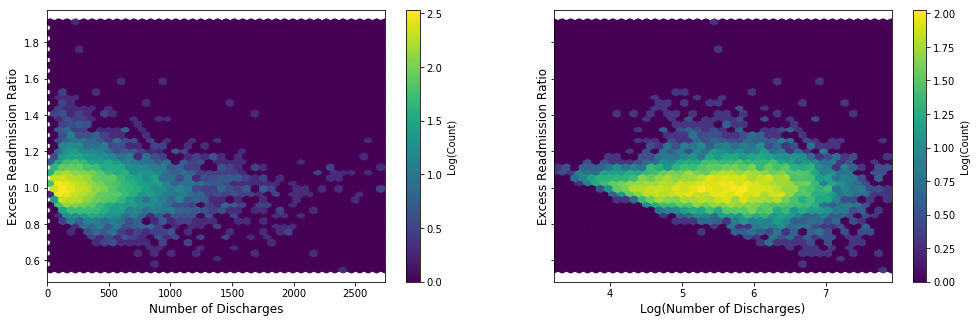

In [6]:
# Create a hexbin plot to show the density of observations
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=40, bins='log')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')

logx = np.log(x)
ax = axs[1]
hb = ax.hexbin(logx, y, gridsize=40, bins='log')
ax.set_xlim([min(logx), max(logx)])
ax.set_xlabel('Log(Number of Discharges)', fontsize=12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')